In [ ]:
#After completing this lab you will be able to:
#Develop prediction models
#In data analytics, we often use Model Development to help us predict future observations from the data we have.
#A model will help us understand the exact relationship between different variables and how these variables are used to predict the result.

In [6]:
pip install skillsnetwork

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import skillsnetwork
import warnings
warnings.filterwarnings('ignore')

In [9]:
await skillsnetwork.download_dataset('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv')


Saved as 'automobileEDA.csv'


In [11]:
df = pd.read_csv("automobileEDA.csv", header=0)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [12]:
#Let's load the modules for linear regression:
from sklearn.linear_model import LinearRegression

In [13]:
#Create the linear regression object:
lm = LinearRegression()
lm

LinearRegression()

In [ ]:
#How could "highway-mpg" help us predict car price?
#For this example, we want to look at how highway-mpg can help us predict car price. Using simple linear regression, we will create a linear function with "highway-mpg" as the predictor variable and the "price" as the response variable.

In [17]:
X = df[['highway-mpg']]

Y = df['price']


In [19]:
#Fit the linear model using highway-mpg:
lm.fit(X,Y)


LinearRegression()

In [20]:
#We can output a prediction:

Yhat=lm.predict(X)
Yhat[0:5]   
  

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [21]:
#What is the value of the intercept (a)?
lm.intercept_

38423.305858157386

In [23]:
#What is the value of the slope (b)?
lm.coef_

array([-821.73337832])

In [ ]:
#What is the final estimated linear model we get?¶
#As we saw above, we should get a final linear model with the structure:

#Yhat=a+bX
 
#Plugging in the actual values we get:

#Price = 38423.31 - 821.73 x highway-mpg

In [24]:
#Create a linear regression object called "lm1".
lm1 = LinearRegression()
lm1

LinearRegression()

In [25]:
#Train the model using "engine-size" as the independent variable and "price" as the dependent variable?
lm1.fit(df[['engine-size']], df[['price']])
lm1

LinearRegression()

In [26]:
#Find the slope and intercept of the model.
# Slope 
lm1.coef_
#Intercept
lm1.intercept_



array([-7963.33890628])

In [29]:
#What is the equation of the predicted line? You can use x and yhat or "engine-size" or "price".

# using X and Y  
#if engine is not defined it will print error (NameError: name 'engine' is not defined).
 
Yhat=-7963.34 + 166.86*X

Price=-7963.34 + 166.86*df['engine-size']


0      13728.46
1      13728.46
2      17399.38
3      10224.40
4      14729.62
         ...   
196    15563.92
197    15563.92
198    20903.44
199    16231.36
200    15563.92
Name: engine-size, Length: 201, dtype: float64

In [30]:
#Multiple Linear Regression
#What if we want to predict car price using more than one variable?

#If we want to use more variables in our model to predict car price, we can use Multiple Linear Regression. Multiple Linear Regression is very similar to Simple Linear Regression, but this method is used to explain the relationship between one continuous response (dependent) variable and two or more predictor (independent) variables. Most of the real-world regression models involve multiple predictors. We will illustrate the structure by using four predictor variables, but these results can generalize to any integer:

In [33]:
#From the previous section we know that other good predictors of price could be:

#Horsepower
#Curb-weight
#Engine-size
#Highway-mpg
#Let's develop a model using these variables as the predictor variables.
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

#Fit the linear model using the four above-mentioned variables.

lm.fit(Z, df['price'])
#What is the value of the intercept(a)?



LinearRegression()

In [34]:
lm.intercept_


-15806.624626329205

In [35]:
#What are the values of the coefficients (b1, b2, b3, b4)?

lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

In [37]:
#What is the final estimated linear model that we get?

#As we saw above, we should get a final linear function with the structure:

#Yhat=a+b_1X_1+b_2X_2+b_3X_3+b_4X_4
 
#What is the linear function we get in this example?

In [ ]:
#Price = -15678.742628061467 + 52.65851272 x horsepower + 4.69878948 x curb-weight + 81.95906216 x engine-size + 33.58258185 x highway-mpg

In [38]:
#Create and train a Multiple Linear Regression model "lm2" where the response variable is "price", and the predictor variable is "normalized-losses" and "highway-mpg".
lm2 = LinearRegression()
lm2.fit(df[['normalized-losses' , 'highway-mpg']],df['price'])


LinearRegression()

In [40]:
#Find the coefficient of the model.
lm2.coef_

array([   1.49789586, -820.45434016])

In [43]:
#2. Model Evaluation Using Visualization
#Now that we've developed some models, how do we evaluate our models and choose the best one? One way to do this is by using a visualization.
#Import the visualization package, seaborn:
import seaborn as sns
%matplotlib inline 

(0.0, 48173.13270835798)

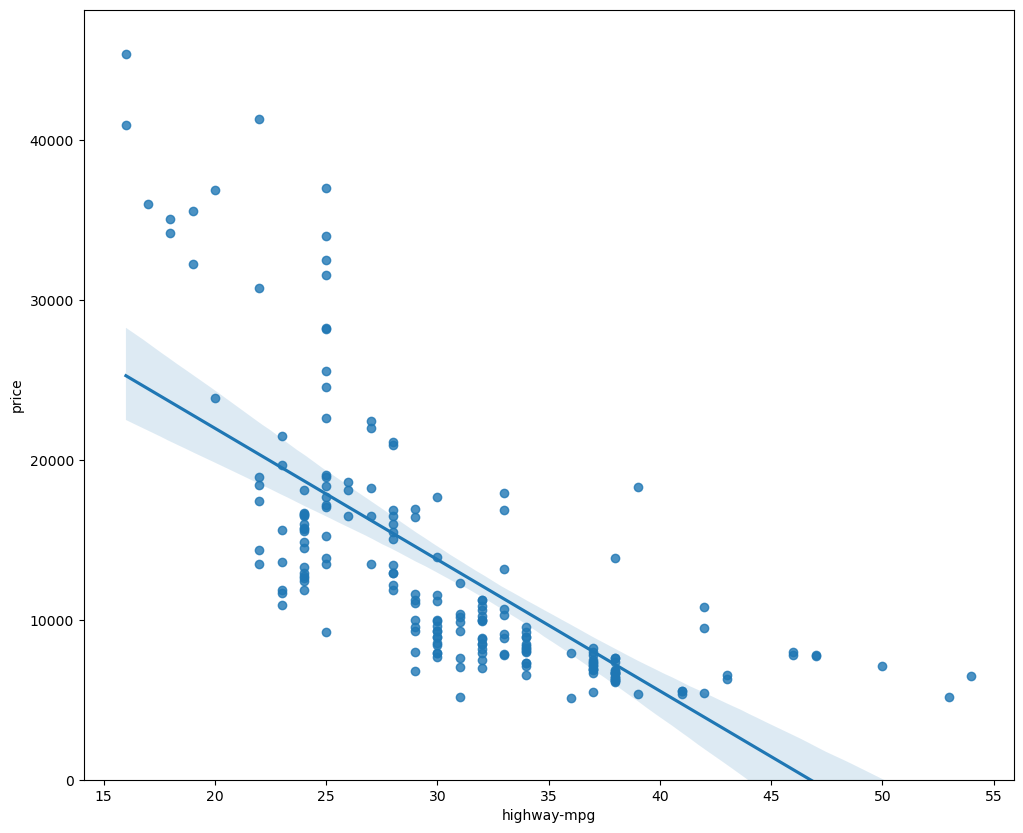

In [44]:
#Regression Plot
#When it comes to simple linear regression, an excellent way to visualize the fit of our model is by using regression plots.

#This plot will show a combination of a scattered data points (a scatterplot), as well as the fitted linear regression line going through the data. This will give us a reasonable estimate of the relationship between the two variables, the strength of the correlation, as well as the direction (positive or negative correlation).

#Let's visualize highway-mpg as potential predictor variable of price:

width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

(0.0, 47414.1)

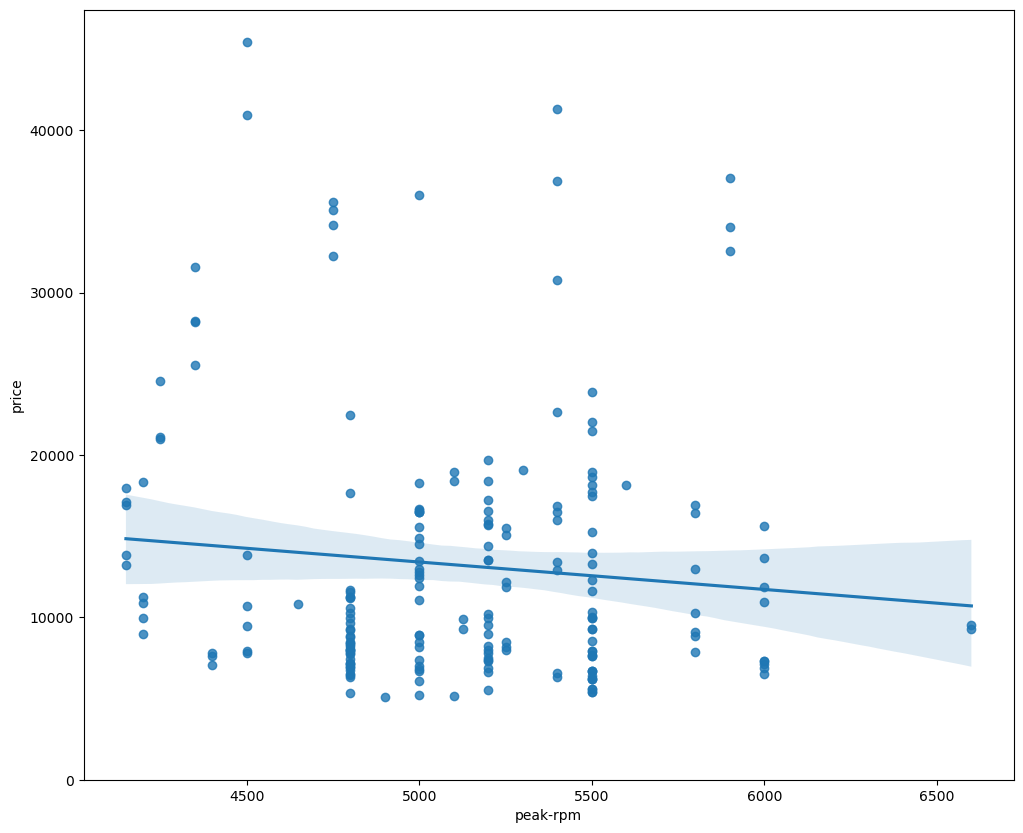

In [45]:
#We can see from this plot that price is negatively correlated to highway-mpg since the regression slope is negative.

#One thing to keep in mind when looking at a regression plot is to pay attention to how scattered the data points are around the regression line. This will give you a good indication of the variance of the data and whether a linear model would be the best fit or not. If the data is too far off from the line, this linear model might not be the best model for this data.

#Let's compare this plot to the regression plot of "peak-rpm".

plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

In [ ]:
#Comparing the regression plot of "peak-rpm" and "highway-mpg", we see that the points for "highway-mpg" are much closer to the generated line and, on average, decrease. The points for "peak-rpm" have more spread around the predicted line and it is much harder to determine if the points are decreasing or increasing as the "peak-rpm" increases.

In [46]:
# The variable "highway-mpg" has a stronger correlation with "price", it is approximate -0.704692  compared to "peak-rpm" which is approximate -0.101616. You can verify it using the following command:

df[["peak-rpm","highway-mpg","price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


In [ ]:
#Residual Plot
#A good way to visualize the variance of the data is to use a residual plot.

#What is a residual?

#The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e). When we look at a regression plot, the residual is the distance from the data point to the fitted regression line.

#So what is a residual plot?

#A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.

#What do we pay attention to when looking at a residual plot?

#We look at the spread of the residuals:

#- If the points in a residual plot are randomly spread out around the x-axis, then a linear model is appropriate for the data.

#Why is that? Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.

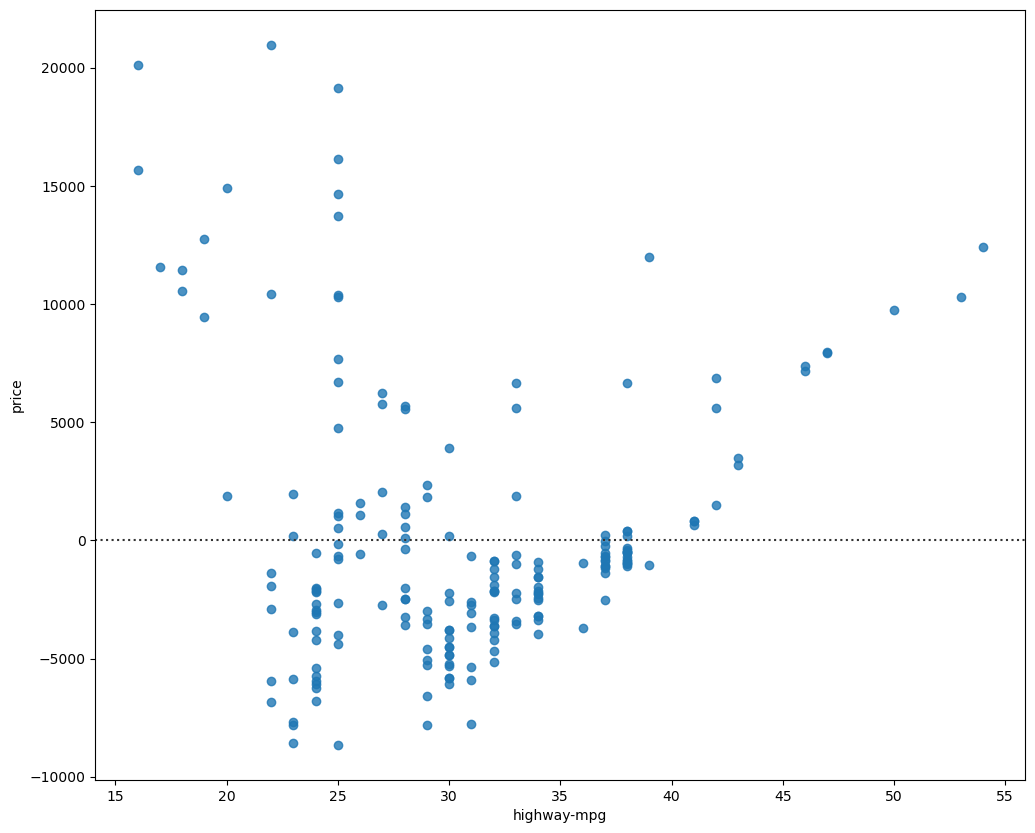

In [47]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'],y=df['price'])
plt.show()

In [ ]:
#What is this plot telling us?

#We can see from this residual plot that the residuals are not randomly spread around the x-axis, leading us to believe that maybe a non-linear model is more appropriate for this data.

#Multiple Linear Regression
#How do we visualize a model for Multiple Linear Regression? This gets a bit more complicated because you can't visualize it with regression or residual plot.

#One way to look at the fit of the model is by looking at the distribution plot. We can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.

#First, let's make a prediction:

In [50]:
Y_hat = lm.predict(Z)


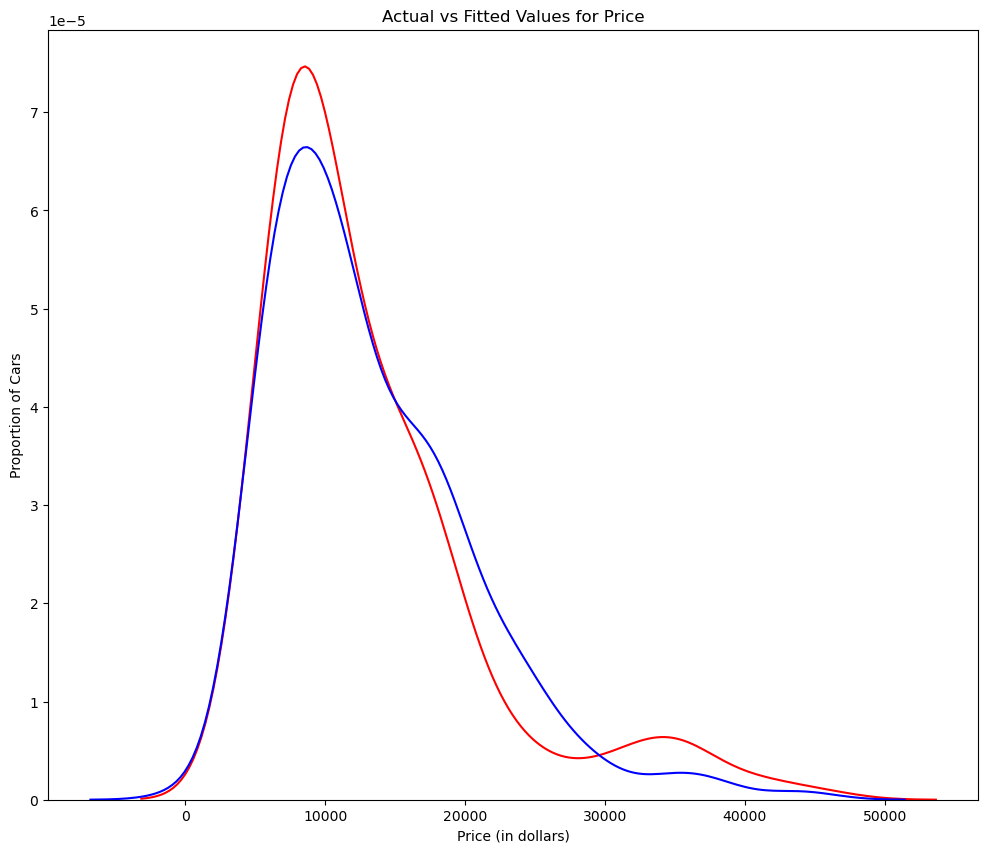

In [51]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [52]:
#We can see that the fitted values are reasonably close to the actual values since the two distributions overlap a bit. However, there is definitely some room for improvement.

In [ ]:
#3. Polynomial Regression and Pipelines

In [ ]:
#Polynomial regression is a particular case of the general linear regression model or multiple linear regression models.

#We get non-linear relationships by squaring or setting higher-order terms of the predictor variables.

#There are different orders of polynomial regression:

In [ ]:
#We saw earlier that a linear model did not provide the best fit while using "highway-mpg" as the predictor variable. Let's see if we can try fitting a polynomial model to the data instead.

#We will use the following function to plot the data:

In [56]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [57]:
#Let's get the variables:

x = df['highway-mpg']
y = df['price']
#Let's fit the polynomial using the function polyfit, then use the function poly1d to display the polynomial function.

# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


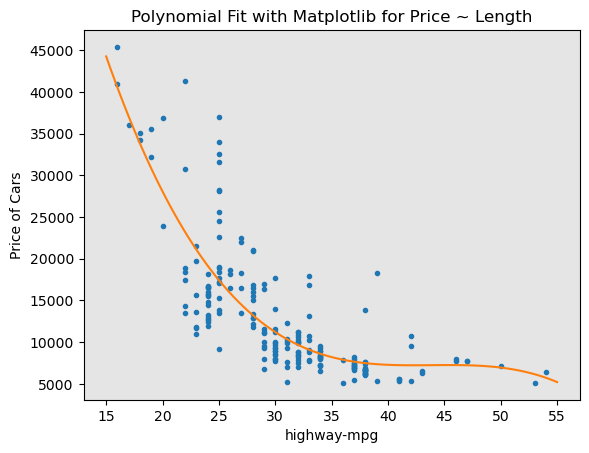

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

In [58]:
#Let's plot the function:

PlotPolly(p, x, y, 'highway-mpg')
np.polyfit(x, y, 3)
#We can already see from plotting that this polynomial model performs better than the linear model. This is because the generated polynomial function "hits" more of the data points.

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


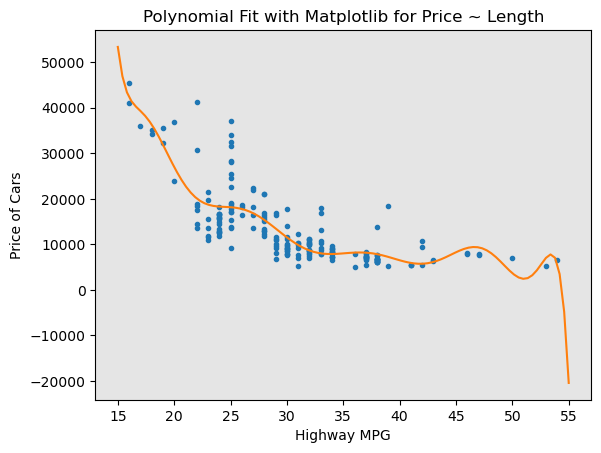

In [59]:
# Here we use a polynomial of the 11rd order (cubic) 
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1,x,y, 'Highway MPG')

In [62]:
from sklearn.preprocessing import PolynomialFeatures

In [63]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [64]:
Z_pr=pr.fit_transform(Z)

In [65]:
Z.shape

(201, 4)

In [66]:
Z_pr.shape

(201, 15)

In [ ]:
#Pipeline
#Data Pipelines simplify the steps of processing the data. We use the module Pipeline to create a pipeline. We also use StandardScaler as a step in our pipeline.

In [67]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [68]:
#We create the pipeline by creating a list of tuples including the name of the model or estimator and its corresponding constructor.

Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]
#We input the list as an argument to the pipeline constructor:

pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [69]:
#First, we convert the data type Z to type float to avoid conversion warnings that may appear as a result of StandardScaler taking float inputs.

#Then, we can normalize the data, perform a transform and fit the model simultaneously.

Z = Z.astype(float)
pipe.fit(Z,y)


Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [70]:
#Similarly, we can normalize the data, perform a transform and produce a prediction simultaneously.

ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

In [71]:
#Create a pipeline that standardizes the data, then produce a prediction using a linear regression model using the features Z and target y.
# Write your code below and press Shift+Enter to execute 

Input=[('scale',StandardScaler()),('model',LinearRegression())]

pipe=Pipeline(Input)

pipe.fit(Z,y)

ypipe=pipe.predict(Z)
ypipe[0:10]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])